<a href="https://colab.research.google.com/github/id-shiv/knowledge_base/blob/master/%5BProject_002%5D_Natural_Language_Processing_(NLP)_Concepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [0]:
import nltk
from nltk.text import Text
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import wordnet as wn  # lexical database
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Terminologies


* Stop Words : Stop words are a set of commonly used words in any language. For example, in English, “the”, “is” and “and”, would easily qualify as stop words.
* Synonyms : A synonym is a word or phrase that means the same (or very nearly the same) as another word or phrase.
* Hypernyms : Y is a hypernym of X if every X is a (kind of) Y.
* Hyponyms : Y is a hyponym of X if every Y is a (kind of) X.
* Holonyms : Y is a holonym of X if X is a part of Y.
* Antonyms : a word opposite in meaning to another (e.g. bad and good ).
* Stemming : process of reducing a word to it's stem.
* Lemmas (Lemmatization) : using morphological analysis of each word.
* POS (Parts of Speech) : is the word tag in a sentense on whether it is a noun, verb, adverb, adjective ... 



# NLTK

## List the Corpuses

In [8]:
nltk.download('all')  # enable this line if the nltk corpus is not downloaded_
# in your environment

# From Gutenberg Collection
print(nltk.corpus.gutenberg.fileids())

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

## Load a Sample Corpus

In [0]:
imported_text = Text(nltk.corpus.gutenberg.words('carroll-alice.txt'))

## NLTK Text Object

In [10]:
print(type(imported_text))

<class 'nltk.text.Text'>


### Number of Words

In [11]:
print(len(imported_text))  # includes punctutions

34110


### Number of unique words

In [12]:
print(len(set(imported_text)))  # includes punctuations

3016


### Concordance

In [13]:
print(imported_text.concordance("great"))

Displaying 25 of 39 matches:
led ' ORANGE MARMALADE ', but to her great disappointment it was empty : she di
 golden key in the lock , and to her great delight it fitted ! Alice opened the
 _I_ shan ' t be able ! I shall be a great deal too far off to trouble myself a
amed of yourself ,' said Alice , ' a great girl like you ,' ( she might well sa
 other : he came trotting along in a great hurry , muttering to himself as he c
n the world am I ? Ah , THAT ' S the great puzzle !' And she began thinking ove
 won ' t indeed !' said Alice , in a great hurry to change the subject of conve
 the Dodo could not answer without a great deal of thought , and it sat for a l
since her swim in the pool , and the great hall , with the glass table and the 
knocking , and hurried upstairs , in great fear lest she should meet the real M
 over her head made her look up in a great hurry . An enormous puppy was lookin
orry it ; then Alice dodged behind a great thistle , to keep herself from being
e hanging o

### Number of word occurance

In [14]:
print(imported_text.count('Alice'))  # input word is case-sensitive

396


### Dispersion Plot

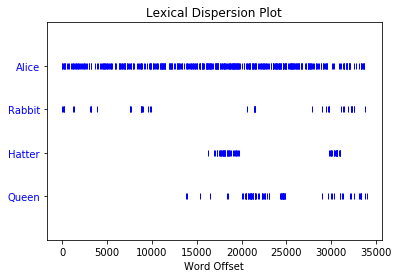

In [15]:
imported_text.dispersion_plot(['Alice', 'Rabbit', 'Hatter', 'Queen'])

### Frequency Distribution

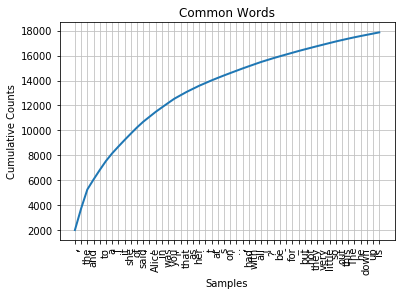

In [16]:
fdist = nltk.FreqDist(imported_text)
fdist.plot(50, cumulative=True, title='Common Words')

#### Without punctuations

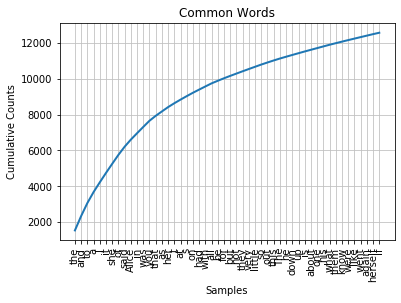

In [17]:
fdist_no_punc = nltk.FreqDist(dict((word, freq) for word, freq in fdist.items() if word.isalpha()))
fdist_no_punc.plot(50, cumulative=True, title='Common Words')

#### Without stopwords

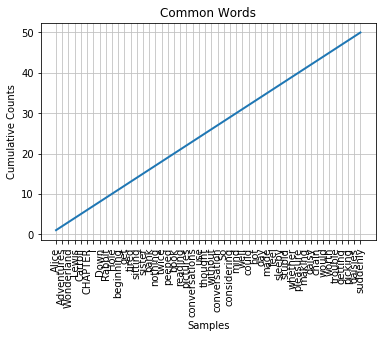

In [18]:
def stop_words():
  return nltk.corpus.stopwords.words('english')

def common_words_freq_dist(text, no_punctuations=True, no_stop_words=True):
  common_words = list()
  fdist = nltk.FreqDist(imported_text)
  for word, freq in fdist.items():
      if word.isalpha() and word not in stop_words():
        common_words.append(word)
  return nltk.FreqDist(common_words)

common_words = common_words_freq_dist(imported_text)

common_words.plot(50, cumulative=True, title='Common Words')

### Hapaxes

Words that occur exactly once in the text

In [19]:
print(fdist.hapaxes())

['Lewis', 'Carroll', '1865', ']', 'Hole', 'conversations', 'daisy', 'chain', 'daisies', 'pink', 'wondered', 'actually', 'TOOK', 'WATCH', 'OUT', 'ITS', 'WAISTCOAT', 'POCKET', 'flashed', 'waistcoat', 'burning', 'field', 'fortunately', 'pop', 'tunnel', 'stopping', 'Either', 'plenty', 'maps', 'hung', 'pegs', 'labelled', 'ORANGE', 'MARMALADE', 'disappointment', 'empty', 'drop', 'killing', 'brave', 'centre', 'schoolroom', 'practice', 'yes', 'THROUGH', 'downward', 'Antipathies', 'country', 'New', 'Zealand', 'Australia', 'curtsey', 'CURTSEYING', '?)', 'ignorant', 'miss', 'saucer', 'dreamy', 'dozing', 'truth', 'heap', 'sticks', 'overhead', 'hurrying', 'lit', 'lamps', 'locked', 'Suddenly', 'solid', 'belong', 'curtain', 'fifteen', 'lock', 'fitted', 'rat', 'knelt', 'loveliest', 'wander', 'doorway', 'lately', 'telescopes', 'printed', 'letters', 'Drink', 'histories', 'burnt', 'eaten', 'poker', 'bleeds', 'disagree', 'flavour', 'cherry', 'tart', 'custard', 'pine', 'apple', 'roast', 'turkey', 'toffee',

### Collocation

A pair or group of words

In [20]:
print(imported_text.collocations())

Mock Turtle; said Alice; March Hare; White Rabbit; thought Alice;
golden key; beautiful Soup; white kid; good deal; kid gloves; Mary
Ann; yer honour; three gardeners; play croquet; Lobster Quadrille;
ootiful Soo; great hurry; old fellow; trembling voice; poor little
None


## WordNet

### Synonym sets

In [21]:
for synset in wn.synsets('Test'):
  print(f'{str(synset)} ; \n\tdefinition : {synset.definition()} ; \n\texamples : {synset.examples()}')

Synset('trial.n.02') ; 
	definition : trying something to find out about it ; 
	examples : ['a sample for ten days free trial', 'a trial of progesterone failed to relieve the pain']
Synset('test.n.02') ; 
	definition : any standardized procedure for measuring sensitivity or memory or intelligence or aptitude or personality etc ; 
	examples : ['the test was standardized on a large sample of students']
Synset('examination.n.02') ; 
	definition : a set of questions or exercises evaluating skill or knowledge ; 
	examples : ['when the test was stolen the professor had to make a new set of questions']
Synset('test.n.04') ; 
	definition : the act of undergoing testing ; 
	examples : ['he survived the great test of battle', 'candidates must compete in a trial of skill']
Synset('test.n.05') ; 
	definition : the act of testing something ; 
	examples : ['in the experimental trials the amount of carbon was measured separately', 'he called each flip of the coin a new trial']
Synset('test.n.06') ; 


### Lemmas

Each synonym in the above synsets is called lemma

In [22]:
print(wn.synset('test.n.02').lemma_names())

['test', 'mental_test', 'mental_testing', 'psychometric_test']


### Hyponyms

In [23]:
test = wn.synset('test.n.02')
for synset in test.hyponyms():
  for lemma in synset.lemmas():
    print(lemma.name())

intelligence_test
IQ_test
personality_test
sub-test


### Hypernym

In [24]:
print(wn.synset('test.n.02'))
print(wn.synset('test.n.02').hypernyms())
print(wn.synset('test.n.02').hypernyms()[0].hypernyms())
print(wn.synset('test.n.02').hypernyms()[0].hypernyms()[0].hypernyms())
print(wn.synset('test.n.02').hypernyms()[0].hypernyms()[0].hypernyms()[0].hypernyms())
print(wn.synset('test.n.02').hypernyms()[0].hypernyms()[0].hypernyms()[0].hypernyms()[0].hypernyms())
print(wn.synset('test.n.02').hypernyms()[0].hypernyms()[0].hypernyms()[0].hypernyms()[0].hypernyms()[0].hypernyms())

Synset('test.n.02')
[Synset('mental_measurement.n.01')]
[Synset('measurement.n.01')]
[Synset('activity.n.01')]
[Synset('act.n.02')]
[Synset('event.n.01')]
[Synset('psychological_feature.n.01')]


### Word Similarity

#### Path Similarity

Similarity in terms of distance between hypernyms and hyponyms

In [25]:
word_1 = wn.synset('test.n.01')
word_2 = wn.synset('test.n.01')
print(word_1.path_similarity(word_2))

word_1 = wn.synset('test.n.01')
word_2 = wn.synset('try.v.02')
print(word_1.path_similarity(word_2))

word_1 = wn.synset('exam.n.01')
word_2 = wn.synset('experiment.n.01')
print('\n-----------------------------')
print(word_1.path_similarity(word_2))
print(word_1.wup_similarity(word_2))
print(word_1.lch_similarity(word_2))

1.0
None

-----------------------------
0.1111111111111111
0.5555555555555556
1.4403615823901665


## Word Cloud

In [0]:
text = 'Software testing is the process of verifying a system with the ' \
        'purpose of identifying any errors, gaps or missing requirement ' \
        'versus the actual requirement. Software testing is broadly ' \
        'categorised into two types - functional testing and non-functional ' \
        'testing.'
word_cloud = WordCloud(stopwords=stop_words()).generate(text)

### Plot

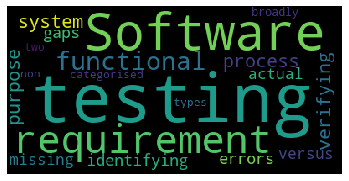

In [27]:
def plot_word_cloud(word_cloud):
  plt.imshow(word_cloud)
  plt.axis('off')
  plt.show()

plot_word_cloud(word_cloud)

## Stemming

In [28]:
stemmer = PorterStemmer()
words = ['tested', 'testing', 'test', 'tests']

for word in words:
  print(f'Stem of the word {word} is {stemmer.stem(word)}')

Stem of the word tested is test
Stem of the word testing is test
Stem of the word test is test
Stem of the word tests is test


## Lemmatization

In [29]:
lemmatizer = WordNetLemmatizer()
word = 'better'

print(lemmatizer.lemmatize(word, pos='v'))
print(lemmatizer.lemmatize(word, pos='a'))
print(lemmatizer.lemmatize(word, pos='r'))
print(lemmatizer.lemmatize(word, pos='n'))

better
good
well
better


# SpaCy

In [30]:
import spacy
language_model = spacy.load('en')

document = "Hello!!, this is poc on how spacy works. lets explore natural language processing etc. in India here today"

loaded_doc = language_model(document)
print(loaded_doc)

cleaned_words = [word for word in loaded_doc if not word.is_stop and word.pos_ != 'PUNCT']
print(cleaned_words)

word_tags = [(word.lemma_, word.pos_, word.shape_, word.ent_type_, word.ent_iob_) for word in cleaned_words]
print(word_tags)

word_entities = [(word.text, word.label_) for word in loaded_doc.ents]
print(word_entities)

sentences = [(num, sentence) for num, sentence in enumerate(loaded_doc.sents)]
print(sentences)

Hello!!, this is poc on how spacy works. lets explore natural language processing etc. in India here today
[Hello, poc, spacy, works, lets, explore, natural, language, processing, etc, India, today]
[('hello', 'INTJ', 'Xxxxx', '', 'O'), ('poc', 'NOUN', 'xxx', '', 'O'), ('spacy', 'NOUN', 'xxxx', '', 'O'), ('work', 'NOUN', 'xxxx', '', 'O'), ('let', 'VERB', 'xxxx', '', 'O'), ('explore', 'VERB', 'xxxx', '', 'O'), ('natural', 'ADJ', 'xxxx', '', 'O'), ('language', 'NOUN', 'xxxx', '', 'O'), ('processing', 'NOUN', 'xxxx', '', 'O'), ('etc', 'X', 'xxx', '', 'O'), ('India', 'PROPN', 'Xxxxx', 'GPE', 'B'), ('today', 'NOUN', 'xxxx', 'DATE', 'B')]
[('India', 'GPE'), ('today', 'DATE')]
[(0, Hello!!, this is poc on how spacy works.), (1, lets explore natural language processing etc.), (2, in India here today)]
